In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Importer les données

In [42]:
df = pd.read_csv("./content/Cardiovascular_Disease_Dataset.csv")
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


**On n'aura pas besoin de la colonne patient id** parcequ'elle n'est pas representative (variance trés petite)

In [43]:
#df = df.drop("patientid", axis=1)
df.sample(5)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
424,4238486,26,0,2,199,536,0,1,162,0,2.9,2,2,1
89,1025078,43,0,0,189,261,0,1,99,0,0.9,1,0,1
894,8991878,34,1,2,175,511,1,0,190,0,0.3,2,3,1
832,8477254,45,1,0,153,0,0,2,176,0,1.0,2,1,1
684,6965501,40,1,0,154,559,0,2,168,1,4.5,2,2,1


**description des données**

In [44]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


# Exploration des données

In [45]:
# Categorical features
categorical_columns = [
    'gender', 'chestpain', 'fastingbloodsugar',
    'restingrelectro', 'exerciseangia',
    'slope', 'noofmajorvessels'
]

# Continuous features
continuous_columns = [
    'age', 'restingBP', 'serumcholestrol',
    'maxheartrate', 'oldpeak'
]

## I- Categorical Features distributions : ##

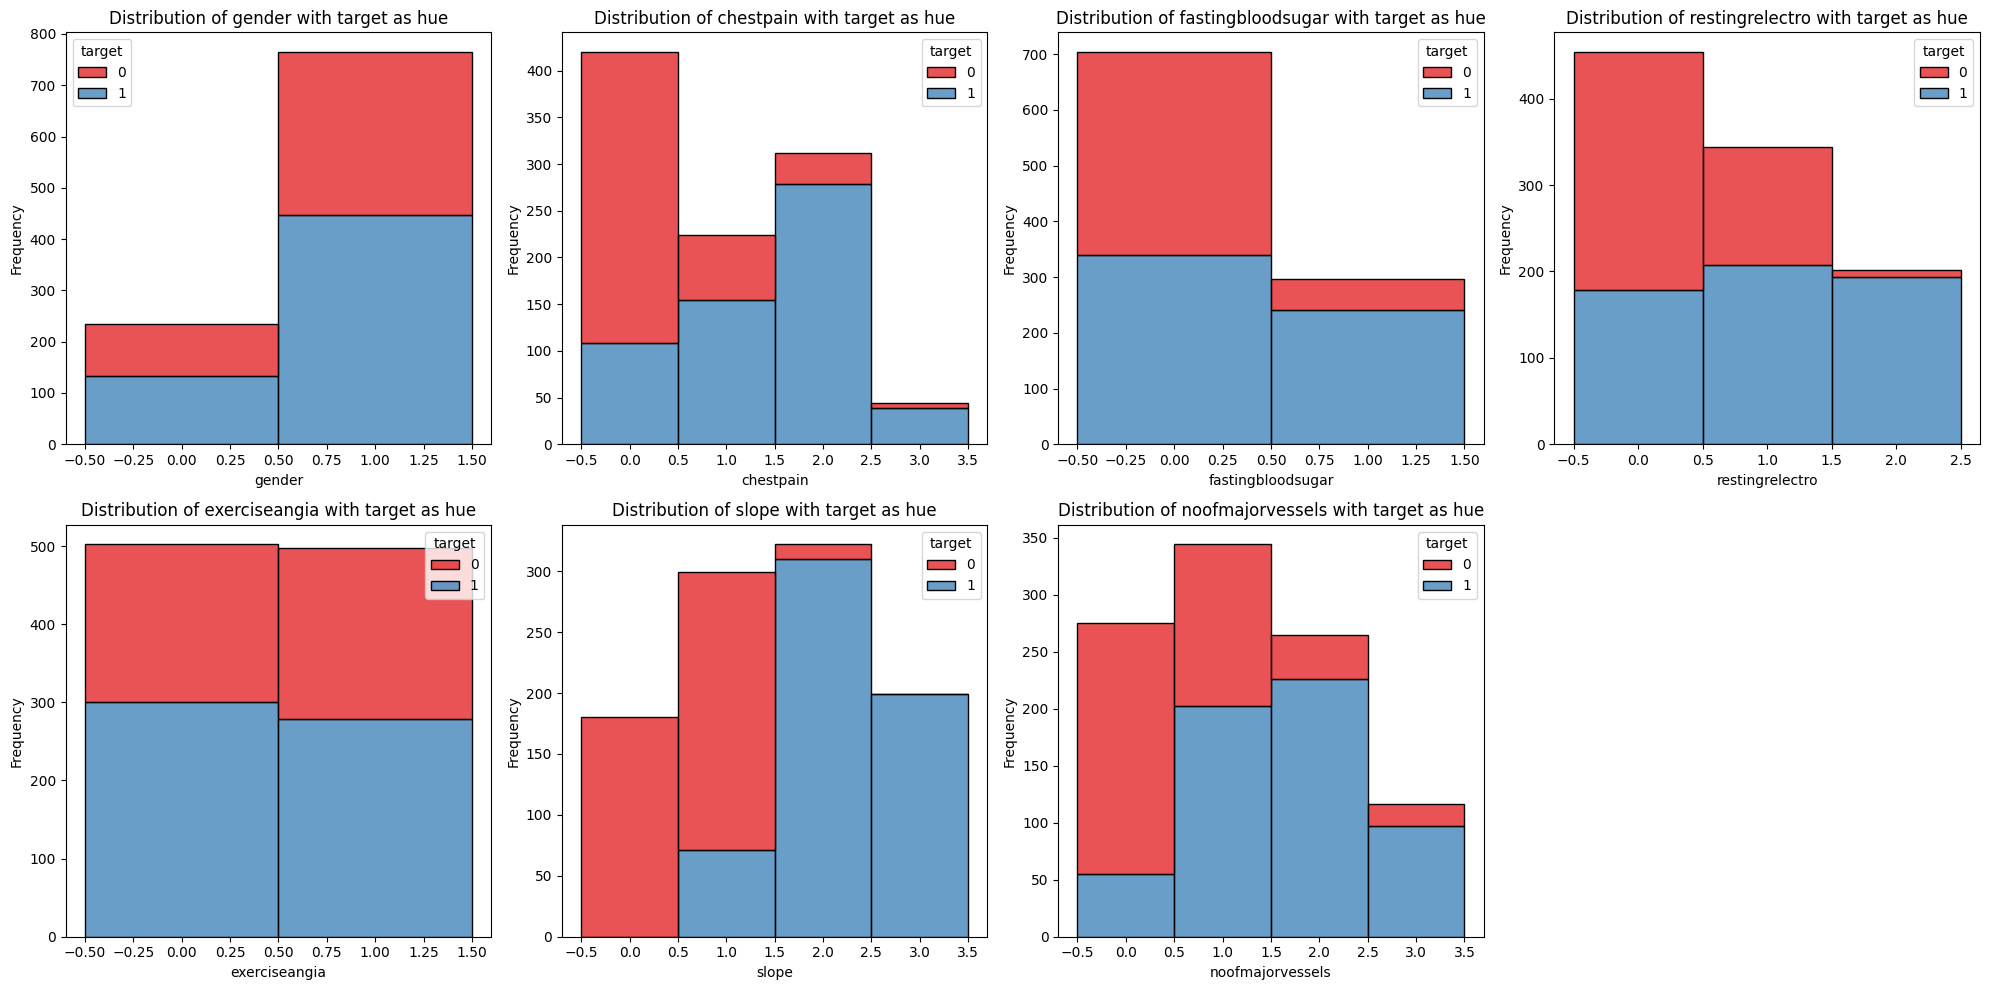

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the grid for subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust grid size if needed
axes = axes.flatten()  # Flatten to easily iterate over

# Loop through each column and plot with target as hue
for i, col in enumerate(categorical_columns):
    sns.histplot(data=df, x=col, hue='target', multiple='stack', discrete=True, palette="Set1", ax=axes[i])
    axes[i].set_title(f'Distribution of {col} with target as hue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any extra subplots (if grid has extra cells)
for j in range(len(categorical_columns), len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

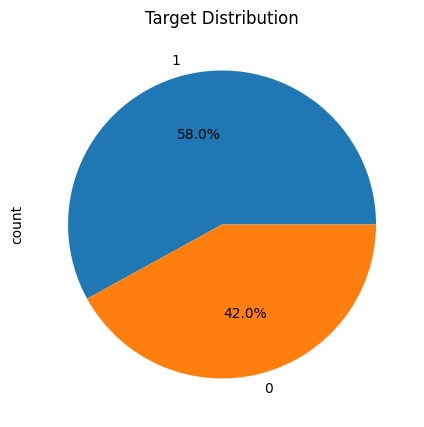

In [47]:
df['target'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(5,5))
plt.title('Target Distribution')
plt.show()

## II - continous features HeatMap : ##

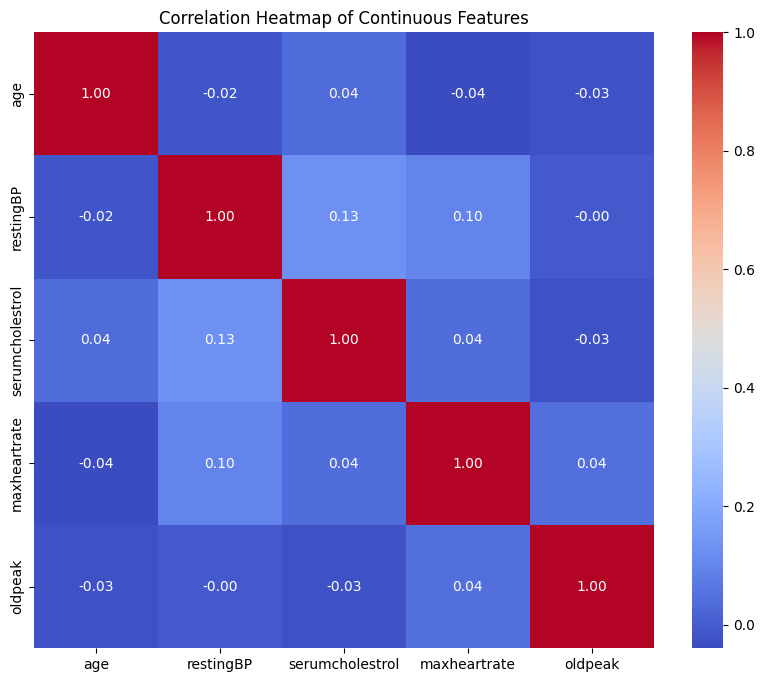

In [48]:
# Calculate correlation matrix
correlation_matrix = df[continuous_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

 ### - WE WILL STRUCTURE OUR PREPROCESSING STEPS IN A PIPELINE  : ###
- categorical features :  Binning Age(do bins)
- continuous features :  normalization / standarization => PCA(dimensiality reduction)

In [49]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer


### choice of n =2 for pca components ###

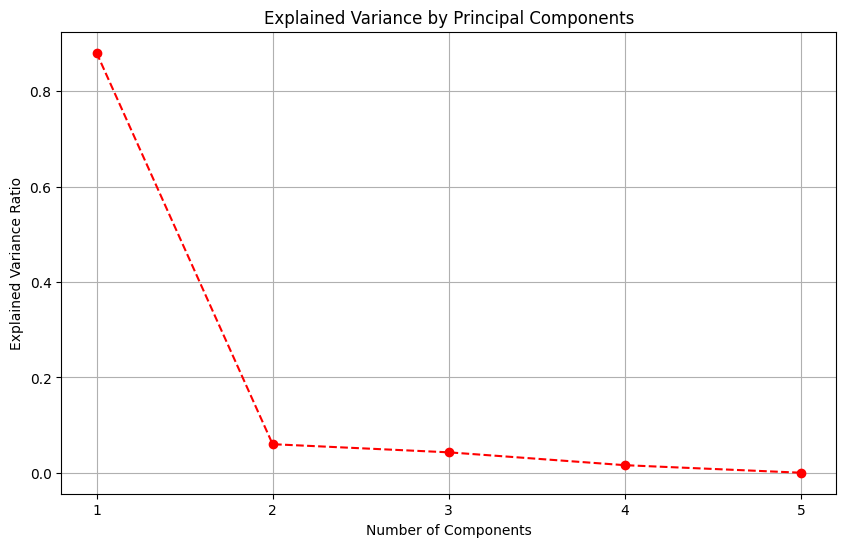

In [50]:

# Fit PCA
pca = PCA()
pca.fit(df[continuous_columns])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--',color='red')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

In [51]:
def bin_age(X):
    # Ensure X is a 1D array by converting to a NumPy array and flattening it
    X = X.to_numpy().flatten()
    # Binning age
    bins = [0, 20, 30, 40, 50, 60]
    labels = ['0-20', '21-30', '31-40', '41-50', '51-60']
    binned_age = pd.cut(X, bins=bins, labels=labels, right=False)
    return binned_age.values.reshape(-1, 1)  # Reshape to 2D array

In [52]:
def label_encode_columns(df):
    df = df.copy()  # Make a copy to avoid modifying the original data
    for col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df


# Create a ColumnTransformer
pipeline = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),  # Normalize continuous columns
            ('pca', PCA(n_components=2))   # Apply PCA
        ]), continuous_columns),
        #('age_bin', FunctionTransformer(bin_age, validate=False), ['age']),  # Age binning
        ('cat', FunctionTransformer(label_encode_columns, validate=False), categorical_columns)
    ],
    remainder='drop'  # Drop any other columns not specified
)

# Fit and transform the pipeline
X_transformed = pipeline.fit_transform(df)

# Convert back to DataFrame for better readability
# Get feature names for one-hot encoded columns
feature_names =  [f'PC{i+1}' for i in range(2)] + categorical_columns

# Create the transformed DataFrame
result_df = pd.DataFrame(X_transformed, columns=feature_names)

result_df.sample(5)

,PC1,PC2,gender,chestpain,fastingbloodsugar,restingrelectro,exerciseangia,slope,noofmajorvessels
507,0.685803,-0.316917,1.0,0.0,0.0,0.0,0.0,2.0,1.0
602,1.157399,1.788946,0.0,1.0,1.0,2.0,0.0,1.0,3.0
636,0.433385,0.402639,1.0,2.0,1.0,2.0,0.0,3.0,1.0
458,0.835002,1.149606,0.0,2.0,0.0,1.0,1.0,2.0,2.0
413,-1.115161,-0.502119,1.0,1.0,0.0,1.0,0.0,0.0,0.0


**On enregistre la pipeline afin de l'utiliser pour traiter les données qu'on aura en entrée**

In [53]:
import joblib

In [54]:
pipeline_filename = 'pipeline.joblib'
joblib.dump(pipeline, pipeline_filename)
print(f"Pipeline saved to {pipeline_filename}")

Pipeline saved to pipeline.joblib


# Entrainement des modéles
*Ségmentation des données en :*  **données d'entrainement** et **données de test**

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,df['target'],test_size=0.2,random_state=42,stratify=df['target'])

*Puisque nous sommes face à un probléme de classification on peut choisir entre plusieur algorithmes : *

*   Logistic regression
*   SVM
*   KNN
*   Random Forrest
*   Naive Bayes
*   Deep Learning : Multi-Layer-Perceptron (MLP)



*Logistic Regression*

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
# training
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
# predicting
yhat = logistic_model.predict(X_test)

# evaluation
print(classification_report(y_test,yhat))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96        84
           1       0.97      0.97      0.97       116

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200



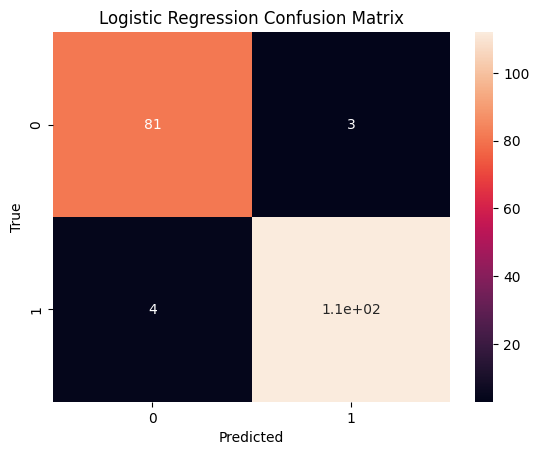

In [59]:
cm = confusion_matrix(y_test,yhat)
sns.heatmap(cm,annot=True)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [60]:
joblib.dump(logistic_model,"logistic_regression.joblib")
print("Pipeline saved to logistic_regression.joblib")

Pipeline saved to logistic_regression.joblib


*SVM*

In [61]:
from sklearn.svm import SVC

In [62]:
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train,y_train)
yhat = model_svm.predict(X_test)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        84
           1       0.96      0.97      0.96       116

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



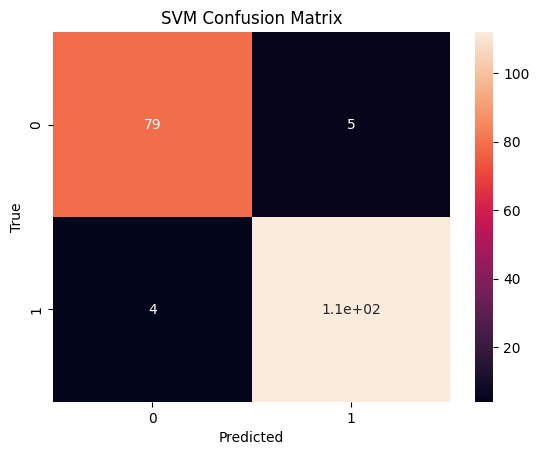

In [63]:
cm = confusion_matrix(y_test,yhat)
sns.heatmap(cm,annot=True)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [64]:
joblib.dump(model_svm,"svm.joblib")
print("Pipeline saved to svm.joblib")

Pipeline saved to svm.joblib


*KNN*

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
yhat = knn_model.predict(X_test)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        84
           1       0.95      0.91      0.93       116

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



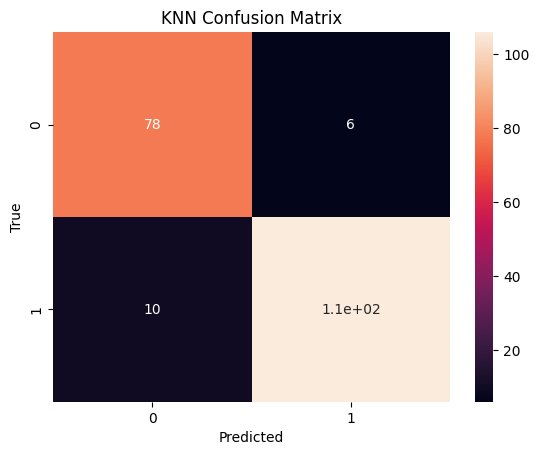

In [67]:
cm = confusion_matrix(y_test,yhat)
sns.heatmap(cm,annot=True)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [68]:
joblib.dump(knn_model,"knn.joblib")
print("Pipeline saved to knn.joblib")

Pipeline saved to knn.joblib


*Naive Bayes*

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)
yhat = model_nb.predict(X_test)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        84
           1       0.93      0.96      0.94       116

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



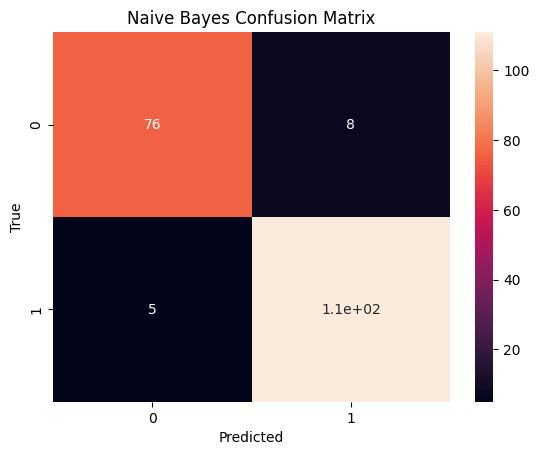

In [71]:
cm = confusion_matrix(y_test,yhat)
sns.heatmap(cm,annot=True)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [72]:
joblib.dump(model_nb,"naive_bayes.joblib")
print("Pipeline saved to naive_bayes.joblib")

Pipeline saved to naive_bayes.joblib


*Random Forrest*

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model_rf = RandomForestClassifier(n_estimators=50,random_state=42)
model_rf.fit(X_train,y_train)
yhat = model_rf.predict(X_test)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        84
           1       0.96      0.95      0.96       116

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



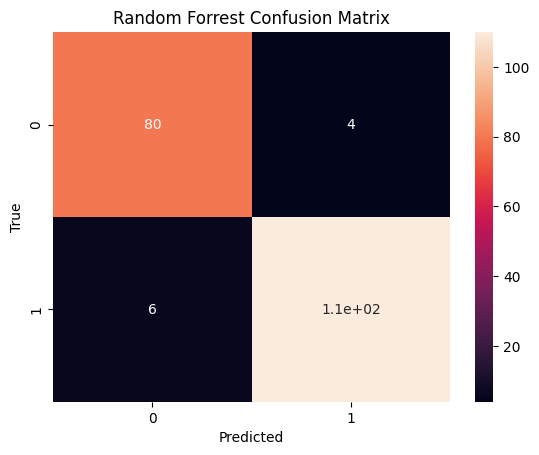

In [75]:
cm = confusion_matrix(y_test,yhat)
sns.heatmap(cm,annot=True)
plt.title('Random Forrest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [76]:
joblib.dump(model_rf,"random_forrest.joblib")
print("Pipeline saved to random_forrest.joblib")

Pipeline saved to random_forrest.joblib


*MLP : Multi-Layer-Perceptron*


*  Dans cette partie nous utiliserons la librairie : **TensorFlow**




In [77]:
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense

In [78]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


c:\Users\Yass\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6685 - loss: 0.6380 - val_accuracy: 0.7937 - val_loss: 0.4676
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7615 - loss: 0.4585 - val_accuracy: 0.8938 - val_loss: 0.3450
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.3324 - val_accuracy: 0.9125 - val_loss: 0.2641
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9022 - loss: 0.2820 - val_accuracy: 0.9125 - val_loss: 0.2155
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9107 - loss: 0.2416 - val_accuracy: 0.9312 - val_loss: 0.1857
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9167 - loss: 0.2164 - val_accuracy: 0.9500 - val_loss: 0.1737
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9388 - loss: 0.1654 - val_accuracy: 0.9438 - val_loss: 0.1556
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9237 - loss: 0.1774 - val_accuracy: 0.9500 - val_loss: 0.1492
Epo

In [79]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)
yhat = model.predict(X_test)
yhat = (yhat > 0.5).astype(int)
print(classification_report(y_test,yhat))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9705 - loss: 0.0943  
Test accuracy: 0.949999988079071
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        84
           1       0.96      0.95      0.96       116

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [80]:
joblib.dump(model,"mlp.joblib")
print("Pipeline saved to mlp.joblib")

Pipeline saved to mlp.joblib


*Les modéles sont performants donc il nous reste qu'à choisir un modéle : le plus performant et le moins couteux en terme de calculs*